In [1]:
# Import our dependencies
import pandas as pd
from path import Path
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import joblib

In [2]:
# Import our clean dataset
file_path = Path("../clean_data/combined_olympic_data.csv")
df = pd.read_csv(file_path)
df.head(10)

,country_name,population,gdp_per_capita,human_development_index,gender_inequality_index,corruption_perceptions_index,total
0,Afghanistan,33370794,613.856689,0.465,0.676,12,1
1,Albania,2889104,4578.631994,0.733,0.267,33,0
2,United Arab Emirates,9214175,43751.838890,0.835,0.247,70,0
3,Argentina,42669500,12334.798250,0.836,0.364,34,4
4,Armenia,2912403,3986.231624,0.733,0.299,37,2
5,Australia,23475686,62510.791170,0.935,0.123,80,38
6,Austria,8546356,51717.495940,0.885,0.083,72,17
7,Azerbaijan,9535079,7891.313147,0.751,0.330,29,9
8,Burundi,9844297,274.857948,0.400,0.483,20,0
9,Belgium,11209057,47700.540360,0.890,0.076,76,3


In [3]:
df = df.set_index("country_name",drop=True)
df.head()

,population,gdp_per_capita,human_development_index,gender_inequality_index,corruption_perceptions_index,total
country_name,,,,,,
Afghanistan,33370794,613.856689,0.465,0.676,12,1
Albania,2889104,4578.631994,0.733,0.267,33,0
United Arab Emirates,9214175,43751.838890,0.835,0.247,70,0
Argentina,42669500,12334.798250,0.836,0.364,34,4
Armenia,2912403,3986.231624,0.733,0.299,37,2


In [4]:
new_df = df.rename(columns={"total": "count_of_medals"})
new_df.head()

,population,gdp_per_capita,human_development_index,gender_inequality_index,corruption_perceptions_index,count_of_medals
country_name,,,,,,
Afghanistan,33370794,613.856689,0.465,0.676,12,1
Albania,2889104,4578.631994,0.733,0.267,33,0
United Arab Emirates,9214175,43751.838890,0.835,0.247,70,0
Argentina,42669500,12334.798250,0.836,0.364,34,4
Armenia,2912403,3986.231624,0.733,0.299,37,2


### Split our preprocessed data into our features and target arrays

In [5]:
# Create our target
y = new_df["count_of_medals"].values

In [6]:
# Create our features
# Transforming CPI to values between 0-1
new_df["corruption_perceptions_index"] = new_df["corruption_perceptions_index"] / 100
# Replacing GDP per capita with total GDP
new_df["gdp_total"] = new_df["population"] * new_df["gdp_per_capita"]
# new_df = new_df.drop(["count_of_medals","population","gdp_per_capita", "gender_inequality_index", "corruption_perceptions_index"], axis=1)
X = new_df.drop(["count_of_medals", "gdp_per_capita"], axis=1)
X.head()

,population,human_development_index,gender_inequality_index,corruption_perceptions_index,gdp_total
country_name,,,,,
Afghanistan,33370794,0.465,0.676,0.12,2.048489e+10
Albania,2889104,0.733,0.267,0.33,1.322814e+10
United Arab Emirates,9214175,0.835,0.247,0.70,4.031371e+11
Argentina,42669500,0.836,0.364,0.34,5.263197e+11
Armenia,2912403,0.733,0.299,0.37,1.160951e+10


In [7]:
# Splitting data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [8]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [9]:
# Training Random Forest Regression model 
rf_model = RandomForestRegressor(n_estimators=128, random_state=15)
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [10]:
# Making predictions with the training data to see how closely the model fits data when it knows the target answer
predictions = rf_model.predict(X_train_scaled)
predictions

array([1.64062500e+00, 0.00000000e+00, 3.90625000e-02, 3.59375000e-01,
       8.89843750e+00, 8.65156250e+01, 2.89843750e+00, 5.43750000e+00,
       2.50781250e+00, 1.79687500e-01, 2.34375000e-02, 1.02343750e+00,
       2.78125000e+00, 3.06250000e+00, 2.19921875e+01, 0.00000000e+00,
       1.79687500e-01, 1.04640625e+02, 9.45312500e-01, 4.68750000e-02,
       2.77343750e+00, 6.48437500e-01, 1.35546875e+01, 2.34375000e-02,
       2.68750000e+00, 1.04921875e+01, 1.29843750e+01, 3.76562500e+00,
       1.06640625e+01, 5.56250000e+00, 3.47265625e+01, 2.02656250e+01,
       1.56250000e-01, 0.00000000e+00, 1.83593750e+00, 0.00000000e+00,
       1.31796875e+01, 1.05703125e+01, 4.45312500e-01, 8.59375000e-02,
       1.15625000e+00, 1.44531250e+00, 6.56250000e-01, 4.85156250e+00,
       1.63281250e+00, 5.35937500e+00, 0.00000000e+00, 7.81250000e-03,
       5.08203125e+01, 6.82812500e+00, 0.00000000e+00, 0.00000000e+00,
       9.21875000e-01, 1.31250000e+00, 1.07812500e+00, 9.37500000e-02,
      

In [11]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances


array([0.08205307, 0.04803596, 0.0752005 , 0.03873386, 0.7559766 ])

In [12]:
# Making predictions with the test data
y_pred = rf_model.predict(X_test_scaled)
y_pred

array([3.12500000e-02, 4.78906250e+00, 4.78906250e+00, 8.59375000e-02,
       7.09375000e+00, 1.32812500e-01, 1.56250000e-02, 1.27343750e+00,
       4.07031250e+00, 2.46640625e+01, 1.53046875e+01, 3.98437500e-01,
       2.11718750e+00, 4.28906250e+00, 4.20312500e+00, 7.65625000e-01,
       7.03125000e-02, 1.61718750e+00, 4.68750000e+00, 9.39062500e+00,
       4.03281250e+01, 9.89062500e+00, 3.98437500e-01, 2.76562500e+00,
       4.14062500e+00, 7.42968750e+00, 4.64062500e+00, 3.41406250e+00,
       3.50000000e+00, 7.89843750e+00, 1.56250000e-02, 4.46875000e+00,
       3.90625000e-02, 4.82031250e+00, 7.03125000e-02, 7.81250000e-03,
       5.65468750e+01, 3.57656250e+01, 2.15625000e+00, 2.99765625e+01])

In [13]:
print(f" Random forest predictive ability (r^2): {rf_model.score(X_test_scaled, y_test):.3f}")

 Random forest predictive ability (r^2): 0.458


In [14]:
print(f" Random forest predictive ability (r^2) (on training data): {rf_model.score(X_train_scaled, y_train):.3f}")

 Random forest predictive ability (r^2) (on training data): 0.958


### Saving the model

In [15]:
joblib.dump(rf_model,"trained_rf_model.joblib")

['trained_rf_model.joblib']

### Visualizing model results 

In [16]:
pred_values_rounded = [round(number) for number in y_pred]
pred_values_rounded

[0.0,
 5.0,
 5.0,
 0.0,
 7.0,
 0.0,
 0.0,
 1.0,
 4.0,
 25.0,
 15.0,
 0.0,
 2.0,
 4.0,
 4.0,
 1.0,
 0.0,
 2.0,
 5.0,
 9.0,
 40.0,
 10.0,
 0.0,
 3.0,
 4.0,
 7.0,
 5.0,
 3.0,
 4.0,
 8.0,
 0.0,
 4.0,
 0.0,
 5.0,
 0.0,
 0.0,
 57.0,
 36.0,
 2.0,
 30.0]

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

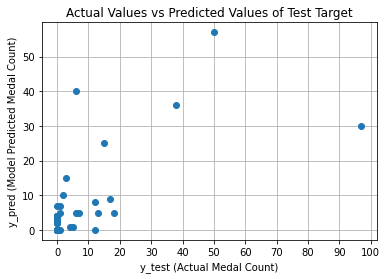

In [18]:
plt.grid()
plt.title("Actual Values vs Predicted Values of Test Target")
plt.xlabel("y_test (Actual Medal Count)")
plt.ylabel("y_pred (Model Predicted Medal Count)")
plt.xticks(np.arange(0,101,step=10.0))
plt.yticks(np.arange(0,101,step=10.0))
plt.plot(y_test, pred_values_rounded, 'o')